In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# Titanic Dataset

In [5]:
df_train = pd.read_csv('train (1).csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test = pd.read_csv('test (1).csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [9]:
df_test.shape

(418, 11)

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [12]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000,418.000,332.000,418.000,418.000,417.000
mean,1100.500,2.266,30.273,0.447,0.392,35.627
std,120.810,0.842,14.181,0.897,0.981,55.908
min,892.000,1.000,0.170,0.000,0.000,0.000
25%,996.250,1.000,21.000,0.000,0.000,7.896
50%,1100.500,3.000,27.000,0.000,0.000,14.454
75%,1204.750,3.000,39.000,1.000,0.000,31.500
max,1309.000,3.000,76.000,8.000,9.000,512.329


In [13]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train['Survived']
all_data = pd.concat((df_train,df_test)).reset_index(drop = True)
all_data = all_data.drop('Survived',axis =  1)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1309, 11)


In [14]:
def missing_chk(df):
    total = df.isnull().sum()
    percent = ((df.isnull().sum())/len(df))*100
    missing_val = pd.concat([total,percent],axis = 1,keys = ['total','percent'])
    actual_missing = (missing_val[missing_val.total !=0])
    return actual_missing.sort_values(by = 'total',ascending = False)

In [15]:
missing_chk(all_data)

,total,percent
Cabin,1014,77.464
Age,263,20.092
Embarked,2,0.153
Fare,1,0.076


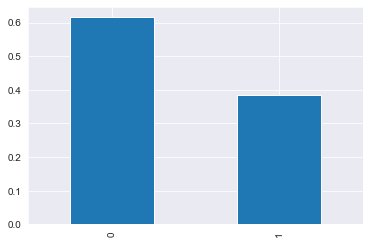

In [16]:
df_train.Survived.value_counts(normalize = True).plot(kind = 'bar')

In [17]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df_train.select_dtypes(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [20]:
df_train.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [21]:
df_train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
df_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
pd.crosstab(df_train.Survived,df_train.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


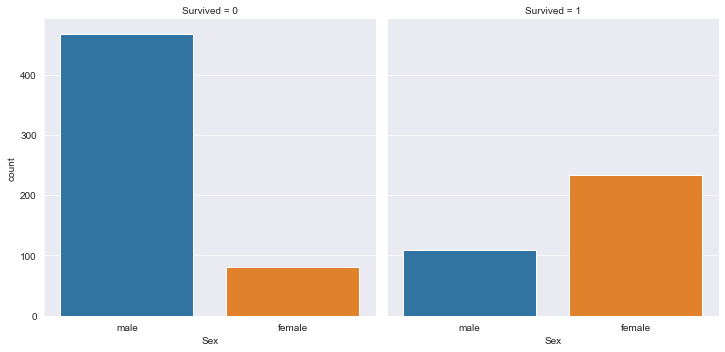

In [24]:
sns.catplot(x = 'Sex', col= 'Survived',data = df_train, kind = 'count')

In [25]:
print('% of female survived:', (df_train[df_train.Sex == 'female']['Survived'].sum())/(df_train[df_train.Sex == 'female']['Survived'].count()))
print('% of male survived:', (df_train[df_train.Sex == 'male']['Survived'].sum())/(df_train[df_train.Sex == 'male']['Survived'].count()))

% of female survived: 0.7420382165605095
% of male survived: 0.18890814558058924


Text(0.5, 1.0, 'male survived')

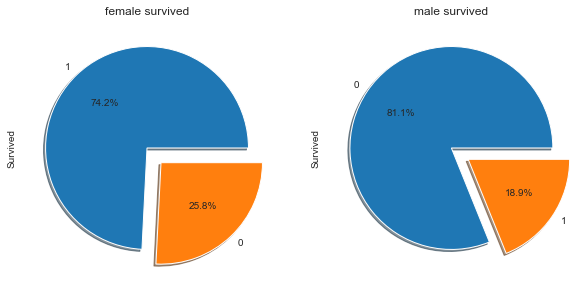

In [26]:
f, ax = plt.subplots(1,2, figsize = (10,7))
df_train[df_train.Sex == 'female']['Survived'].value_counts().plot.pie(explode = [0,0.2], autopct = '%1.1f%%',ax = ax[0],shadow = True)
df_train[df_train.Sex == 'male']['Survived'].value_counts().plot.pie(explode = [0,0.2], autopct = '%1.1f%%',ax = ax[1],shadow = True)
ax[0].set_title('female survived')
ax[1].set_title('male survived')

In [27]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [28]:
print('% survived in pclass 1:', df_train[df_train.Pclass == 1]['Survived'].sum()/df_train[df_train.Pclass == 1]['Survived'].count())
print('% survived in pclass 2:', df_train[df_train.Pclass == 2]['Survived'].sum()/df_train[df_train.Pclass == 2]['Survived'].count())
print('% survived in pclass 3:', df_train[df_train.Pclass == 3]['Survived'].sum()/df_train[df_train.Pclass == 3]['Survived'].count())

% survived in pclass 1: 0.6296296296296297
% survived in pclass 2: 0.47282608695652173
% survived in pclass 3: 0.24236252545824846


Text(0.5, 1.0, 'survivrd in 3 class')

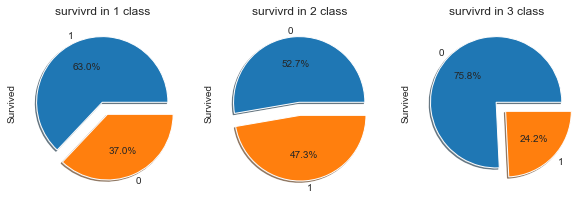

In [29]:
fig, ax = plt.subplots(1,3,figsize = (10,7))
df_train[df_train.Pclass == 1]['Survived'].value_counts().plot.pie(explode = [0,0.2],autopct = '%1.1f%%',ax = ax[0],shadow = True)
df_train[df_train.Pclass == 2]['Survived'].value_counts().plot.pie(explode = [0,0.2],autopct = '%1.1f%%',ax = ax[1],shadow = True)
df_train[df_train.Pclass == 3]['Survived'].value_counts().plot.pie(explode = [0,0.2],autopct = '%1.1f%%',ax = ax[2],shadow = True)
ax[0].set_title('survivrd in 1 class')
ax[1].set_title('survivrd in 2 class')
ax[2].set_title('survivrd in 3 class')

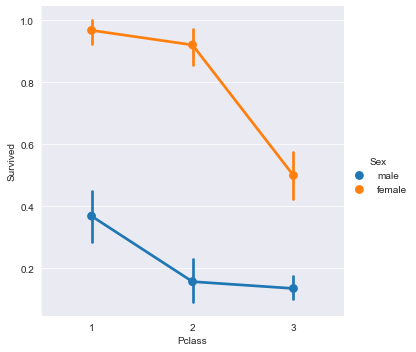

In [30]:
sns.catplot('Pclass', 'Survived',data = df_train, kind = 'point',hue = 'Sex')

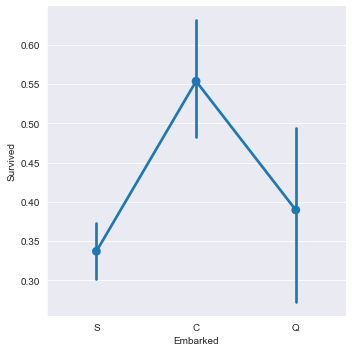

In [31]:
sns.catplot('Embarked','Survived',data = df_train, kind = 'point')

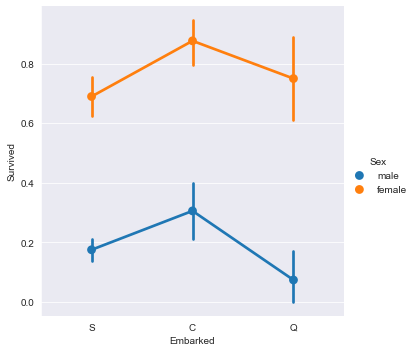

In [32]:
sns.catplot('Embarked','Survived',data = df_train, kind = 'point',hue = 'Sex')

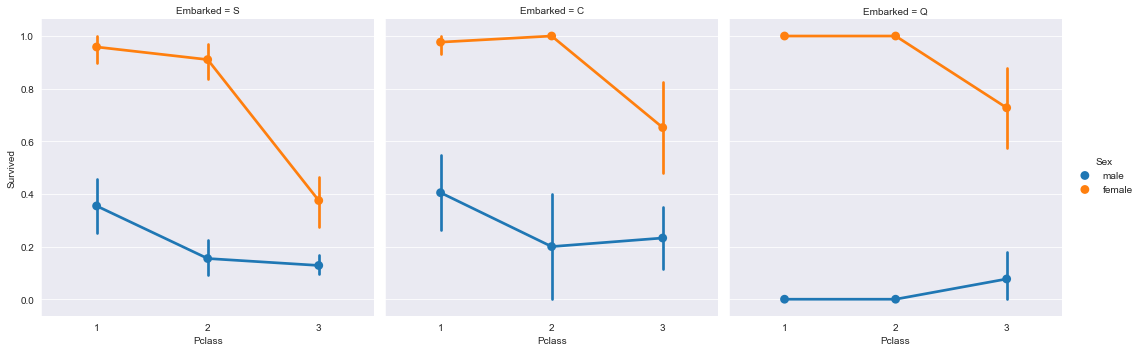

In [33]:
sns.catplot('Pclass', 'Survived',data = df_train, kind = 'point',col = 'Embarked',hue = 'Sex')

In [34]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

In [35]:
df_train['age_bins'] = pd.qcut(df_train.Age,8,labels=[1,2,3,4,5,6,7,8])
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,6
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,6
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,6


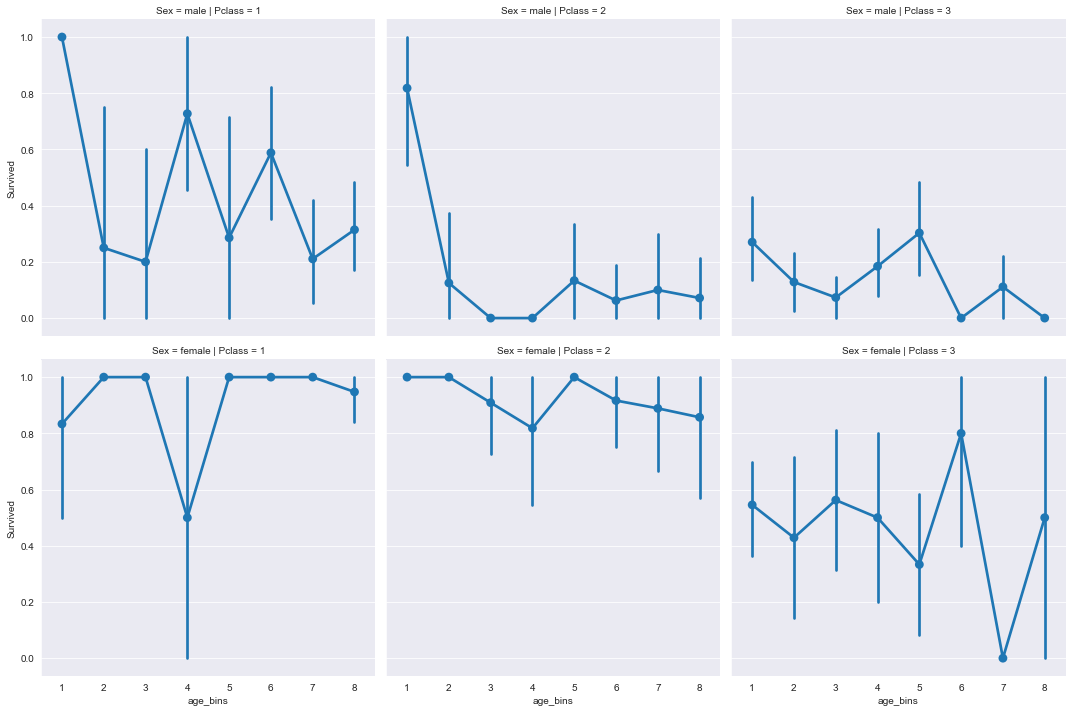

In [36]:
sns.catplot('age_bins','Survived',data = df_train, kind = 'point',row = 'Sex',col = 'Pclass')

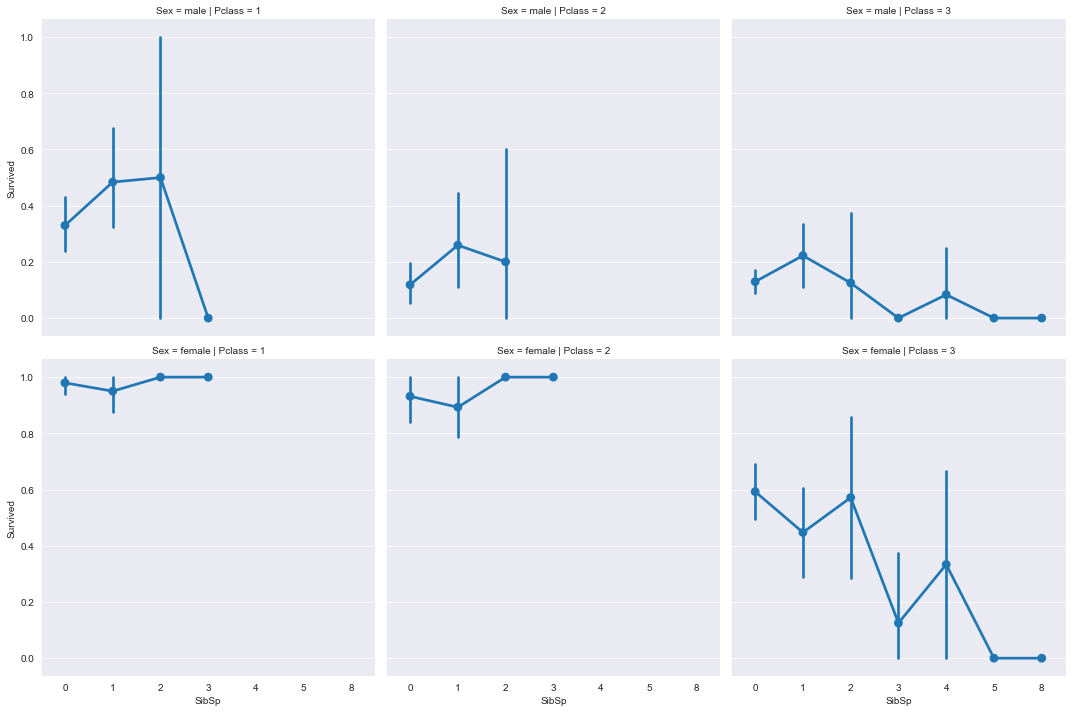

In [37]:
sns.catplot('SibSp','Survived',data = df_train, kind = 'point',row = 'Sex',col = 'Pclass')

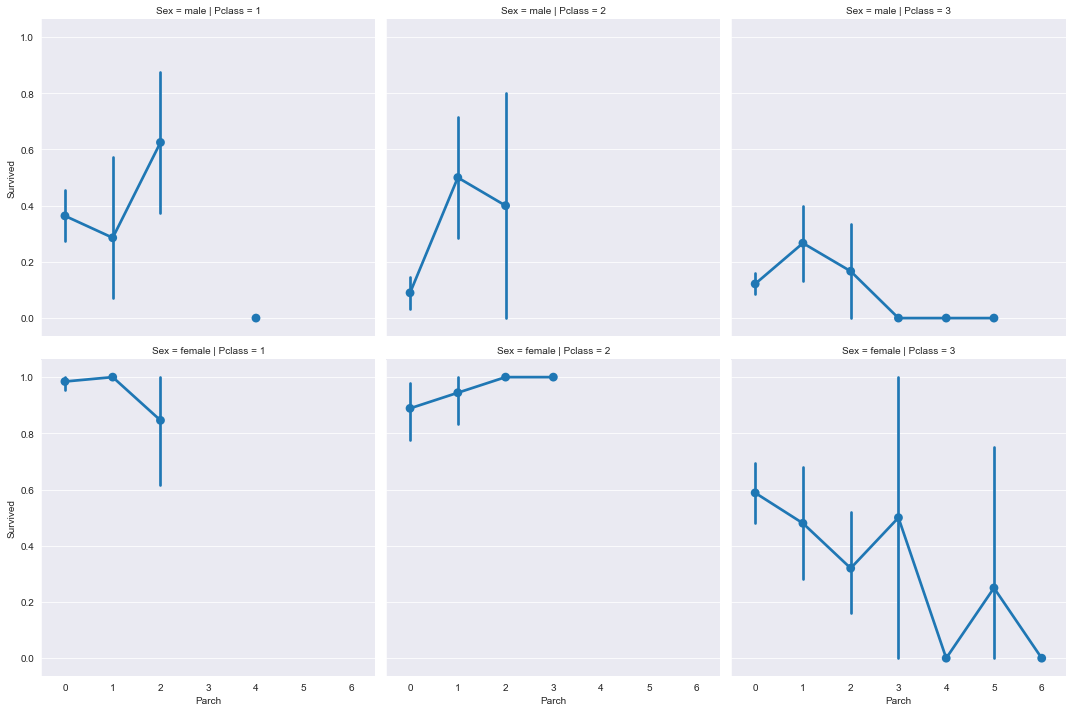

In [38]:
sns.catplot('Parch','Survived',data = df_train, kind = 'point',row = 'Sex',col = 'Pclass')

In [39]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,22.000,NaN,S,7.250,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171
1,38.000,C85,C,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599
2,26.000,NaN,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282
3,35.000,C123,S,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803
4,35.000,NaN,S,8.050,"Allen, Mr. William Henry",0,5,3,male,0,373450


In [40]:
df1 = df_train.copy(deep = True) 

In [41]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [42]:
all_data[all_data.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
61,38.000,B28,NaN,80.000,"Icard, Miss. Amelie",0,62,1,female,0,113572
829,62.000,B28,NaN,80.000,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,113572


In [43]:
all_data.groupby(['Pclass','Embarked']).median()['Fare']

Pclass  Embarked
1       C          76.729
        Q          90.000
        S          52.000
2       C          15.315
        Q          12.350
        S          15.375
3       C           7.896
        Q           7.750
        S           8.050
Name: Fare, dtype: float64

In [44]:
all_data.Embarked.fillna('C',inplace = True)

### Fare

In [45]:
all_data[all_data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
1043,60.500,NaN,S,nan,"Storey, Mr. Thomas",0,1044,3,male,0,3701


In [46]:
all_data[(all_data.Embarked == 'S') & (all_data.Pclass == 3)]['Fare'].median()

8.05

In [47]:
all_data['Fare'] = all_data['Fare'].fillna(8.05)

### Age

In [48]:
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [49]:
all_data['Title'] = all_data['Name'].apply(lambda x: GetTitle(x))

In [50]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title
0,22.000,NaN,S,7.250,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,Mr
1,38.000,C85,C,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,Mrs
2,26.000,NaN,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,Miss
3,35.000,C123,S,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,Mrs
4,35.000,NaN,S,8.050,"Allen, Mr. William Henry",0,5,3,male,0,373450,Mr


In [51]:
all_data['Age'] = all_data.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [52]:
all_data.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
Title             0
dtype: int64

In [53]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title
0,22.000,NaN,S,7.250,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,Mr
1,38.000,C85,C,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,Mrs
2,26.000,NaN,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,Miss
3,35.000,C123,S,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,Mrs
4,35.000,NaN,S,8.050,"Allen, Mr. William Henry",0,5,3,male,0,373450,Mr


In [54]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [55]:
all_data.drop(['Cabin','Name','PassengerId','Ticket','Title'],axis = 1,inplace = True)

In [56]:
all_data.shape

(1309, 7)

In [57]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [58]:
all_data['Pclass'] = all_data['Pclass'].astype(str)

In [59]:
numerical_feat = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feat = all_data[numerical_feat].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feat,columns = ['skew'])
skewness

,skew
Fare,4.364
SibSp,3.840
Parch,3.665
Age,0.480


In [62]:
from scipy.special import boxcox1p
lam = 0.15
skewness = skewness[skewness['skew'] > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
skewness_feat = skewness.index
for i in skewness_feat:
    all_data[i] = boxcox1p(all_data[i],lam)

There are 3 skewed numerical features to Box Cox transform


In [63]:
all_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.000,S,1.372,0.000,3,male,0.572
1,38.000,C,2.260,0.000,1,female,0.572
2,26.000,S,1.409,0.000,3,female,0.000
3,35.000,S,2.154,0.000,1,female,0.572
4,35.000,S,1.416,0.000,3,male,0.000


In [64]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1309, 12)


In [65]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [66]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 12)


## Modelling

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin,TransformerMixin,clone

#### Cross val strategy

In [126]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
rf = RandomForestClassifier(n_estimators=100,random_state=0)
nb = GaussianNB()
nb_bag = BaggingClassifier(base_estimator=nb,n_estimators=10,random_state=0)
lr_bag = BaggingClassifier(base_estimator=lr,n_estimators=10,random_state=0)
dt_bag = BaggingClassifier(base_estimator=dt,n_estimators=10,random_state=0)
nb_boost = AdaBoostClassifier(base_estimator=nb,n_estimators=50,random_state=0)
lr_boost = AdaBoostClassifier(base_estimator=lr,n_estimators=50,random_state=0)
dt_boost = AdaBoostClassifier(base_estimator=dt,n_estimators=50,random_state=0)
rf_boost = AdaBoostClassifier(base_estimator=rf,n_estimators=50,random_state=0)
gboost = GradientBoostingClassifier(n_estimators=49,random_state = 0)
LR_bag_best = BaggingClassifier(base_estimator=lr,n_estimators=81)
svc = SVC(C=1000)

In [127]:
models = []
models.append(('logit',lr))
models.append(('dt',dt))
models.append(('RandomForest',rf))
models.append(('NB',nb))
models.append(('nb_bag',nb_bag))
models.append(('lr_bag',lr_bag))
models.append(('dt_bag',dt_bag))
models.append(('nb_boost',nb_boost))
models.append(('lr_boost',lr_boost))
models.append(('dt_boost',dt_boost))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('LR_bag_best',LR_bag_best))
models.append(('svc',svc))

In [128]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=5,shuffle=True,random_state=42).get_n_splits(train.values)
    cv_results = cross_val_score(model,train,y_train,cv = kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" %(name, np.mean(cv_results),np.std(cv_results,ddof = 1)))

logit: 0.789021 (0.022766)
dt: 0.792449 (0.042489)
RandomForest: 0.809246 (0.041743)
NB: 0.766593 (0.022087)
nb_bag: 0.754315 (0.053825)
lr_bag: 0.792386 (0.023619)
dt_bag: 0.810363 (0.023513)
nb_boost: 0.472569 (0.135979)
lr_boost: 0.784533 (0.020169)
dt_boost: 0.791281 (0.027243)
rf_boost: 0.794671 (0.044981)
gboost: 0.827180 (0.027178)
LR_bag_best: 0.789021 (0.022766)
svc: 0.824876 (0.029534)


In [75]:
lr_boost.fit(train,y_train)
pred_train = lr_boost.predict(train)
pred_train_prob = lr_boost.predict_proba(train)[:,1]
pred_test = lr_boost.predict(test)
roc_auc_score(y_train,pred_train_prob)
accuracy_score(y_train,pred_train)

0.7890011223344556

In [181]:
pred3 = pd.DataFrame(pred_test)
pred3.to_csv('titanic_submission3.csv')

In [76]:
svc.fit(train,y_train)
pred_train = svc.predict(train)
pred_test = svc.predict(test)
accuracy_score(y_train,pred_train)

0.6341189674523008

In [77]:
pred_svc = pd.DataFrame(pred_test)
pred_svc.to_csv('titanic_submissionsvc.csv')

#### Naive Bayes 

In [82]:
nb = GaussianNB()
nb.fit(train,y_train)
pred_train = nb.predict(train)
pred_train_prob = nb.predict_proba(train)[:,1]
pred_test = nb.predict(test)
roc_auc_score(y_train,pred_train_prob)

0.8433781782933351

In [83]:
pred13 = pd.DataFrame(pred_test)
pred13.to_csv('titanic_submission_nb.csv')

#### Random Forest

In [84]:
rf.fit(train,y_train)
pred_train = rf.predict(train)
pred_train_prob = rf.predict_proba(train)[:,1]
pred_test = rf.predict(test)
roc_auc_score(y_train,pred_train_prob)
accuracy_score(y_train,pred_train)

0.9775533108866442

In [183]:
pred4 = pd.DataFrame(pred_test)
pred4.to_csv('titanic_submission4.csv')

In [265]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rforest = RandomForestClassifier()
params = {'n_estimators': sp_randint(50,200),'max_features': sp_randint(1,24), 'max_depth': sp_randint(2,10),
         'min_samples_split': sp_randint(2,20), 'min_samples_leaf': sp_randint(1,20), 
         'criterion':['gini','entropy']}

rsearch_rfc = RandomizedSearchCV(rforest,param_distributions=params,n_iter = 200, cv = 3,scoring = 'roc_auc', random_state=3,return_train_score= True)
rsearch_rfc.fit(train,y_train)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [272]:
rsearch_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 185}

In [273]:
rforest = RandomForestClassifier(**rsearch_rfc.best_params_)
rforest.fit(train,y_train)
pred_train = rforest.predict(train)
pred_train_prob = rforest.predict_proba(train)[:,1]
pred_test = rforest.predict(test)
roc_auc_score(y_train,pred_train_prob)

0.9247595308855016

In [274]:
pred12 = pd.DataFrame(pred_test)
pred12.to_csv('titanic_submission_rf.csv')

#### Logistics Regression

In [85]:
lr.fit(train,y_train)
pred_train = lr.predict(train)
pred_train_prob = lr.predict_proba(train)[:,1]
pred_test = lr.predict(test)
roc_auc_score(y_train,pred_train_prob)

0.8593029324982159

In [190]:
pred5 = pd.DataFrame(pred_test)
pred5.to_csv('titanic_submission5.csv')

In [117]:
auc_var = []
for i in range(1,100):
    LR_bag = BaggingClassifier(base_estimator=lr,n_estimators=i)
    kfold = KFold(shuffle = True, n_splits = 5, random_state = 0)
    results = cross_val_score(LR_bag,train,y_train,cv = kfold, scoring = 'roc_auc')
    auc_var.append(np.var(results,ddof = 1))
print(auc_var)

[0.0006213541082751696, 0.0007519839961608057, 0.0006739385193872305, 0.0009135417316575535, 0.0008760489285485099, 0.000787821890000048, 0.0007248461990780753, 0.0007521335391950852, 0.0006972824152466394, 0.0007340558850449479, 0.0007339974188855726, 0.0006505528260150667, 0.0007160136515059075, 0.0007478892317219987, 0.0008220502723036828, 0.0007219081384526472, 0.0007055573360934826, 0.000772601193356868, 0.0006712903484201894, 0.0007730393208512027, 0.0007088757932402688, 0.0007189194568087324, 0.0006895148302983357, 0.0007513752070147387, 0.0007188447281629422, 0.000739902133941045, 0.0007271016274786434, 0.0007324306916580163, 0.000723282350101896, 0.0007559871911468274, 0.000700711086897237, 0.0006995845136952415, 0.0006736837573754946, 0.0007572058950211485, 0.000757047853324594, 0.0007115401347462969, 0.0007874902300342213, 0.0007222724488755976, 0.0007159362082709278, 0.0006963088609286149, 0.0006943459176506417, 0.0006918377267177047, 0.0007762068568056403, 0.00075268516025

In [118]:
np.argmin(auc_var)

80

In [120]:
np.min(auc_var)

0.0006138775408609752

In [86]:
LR_bag = BaggingClassifier(base_estimator=lr,n_estimators=81)
LR_bag.fit(train,y_train)
pred_train = LR_bag.predict(train)
pred_train_prob = LR_bag.predict_proba(train)[:,1]
pred_test = LR_bag.predict(test)
roc_auc_score(y_train,pred_train_prob)

0.8594573866359889

In [192]:
pred6 = pd.DataFrame(pred_test)
pred6.to_csv('titanic_submission6.csv')

#### Gboost

In [124]:
auc_avg = []
for i in range(1,100):
    Gboost = GradientBoostingClassifier(n_estimators=i,random_state=0)
    kfold = KFold(shuffle = True, n_splits = 15, random_state = 0)
    results = cross_val_score(Gboost,train,y_train,cv = kfold, scoring = 'roc_auc')
    auc_avg.append(np.mean(results))
print(auc_avg)

[0.8534437595847669, 0.8559104013767886, 0.8608959682059644, 0.8666626495859224, 0.8727642268463629, 0.873514216354424, 0.8737052455438477, 0.8738033034172678, 0.8748125818548383, 0.8696892951890823, 0.8704903073369779, 0.8690860093922053, 0.8653770665897267, 0.8664789794794561, 0.8688038154376773, 0.8670475503958772, 0.8695096309779025, 0.8664854501370002, 0.8668711656254975, 0.8673756409626873, 0.8676983520218563, 0.8684768606636779, 0.8698198389777829, 0.8705215804216532, 0.8712822726533667, 0.8703439109548299, 0.8724360485346128, 0.8730353130384665, 0.8732632846960757, 0.8732072171642284, 0.8729082207748279, 0.8740186336492677, 0.873953497706085, 0.8731371244794516, 0.872492470957522, 0.872584048235833, 0.8736078493303708, 0.8742667924843271, 0.8742550483224661, 0.8750447339928242, 0.8763180979733873, 0.876105958194787, 0.8766094664778065, 0.8768400026065689, 0.8779168619199762, 0.877152897219586, 0.8765641105516166, 0.8775528004436162, 0.8781691255961613, 0.875731715224669, 0.8764

In [122]:
np.max(auc_avg)

0.8781691255961613

In [125]:
np.argmax(auc_avg)

48

In [137]:
gboost.fit(train,y_train)
pred_train = gboost.predict(train)
pred_train_prob = gboost.predict_proba(train)[:,1]
pred_test = gboost.predict(test)
roc_auc_score(y_train,pred_train_prob)

0.9263626583154912

In [138]:
pred1 = pd.DataFrame(pred_test)
pred1.to_csv('titanic_submission1.csv')

#### Xgboost

In [87]:
model_xgb = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [88]:
model_xgb.fit(train,y_train)
pred_train = model_xgb.predict(train)
pred_train_prob = model_xgb.predict_proba(train)[:,1]
pred_test = model_xgb.predict(test)
roc_auc_score(y_train,pred_train_prob)

[13:59:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.963431651381033

In [194]:
pred7 = pd.DataFrame(pred_test)
pred7.to_csv('titanic_submission7.csv')

In [89]:
results = []
kfold = KFold(n_splits=5,shuffle=True,random_state=42).get_n_splits(train.values)
cv_results = cross_val_score(model_xgb,train,y_train,cv = kfold,scoring='roc_auc')
results.append(cv_results)
print("%f (%f)" %(np.mean(cv_results),np.std(cv_results,ddof = 1)))

[13:59:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:59:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:59:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [163]:
auc_avg = []
for i in range(1,1000):
    model_xgb_def = xgb.XGBClassifier(n_estimators=i,random_state=0)
    kfold = KFold(shuffle = True, n_splits = 5, random_state = 0)
    results = cross_val_score(model_xgb_def,train,y_train,cv = kfold, scoring = 'roc_auc')
    auc_avg.append(np.mean(results))
print(auc_avg)

[0.8666349444174155, 0.8679855365160061, 0.8662583030142331, 0.8657188226743419, 0.8674041354849411, 0.8726608482981236, 0.8733363100662326, 0.8756236542539122, 0.8713609743685922, 0.8710708072958602, 0.8732412630462278, 0.8723373551495944, 0.872026988043077, 0.8737244818040392, 0.8724539531442215, 0.8723817104760615, 0.8737394422414052, 0.8729600136752493, 0.87192931908644, 0.8721323096093252, 0.8726912735225388, 0.8724516135373437, 0.8719116491188995, 0.8705358820315989, 0.8704778504003821, 0.8700880199208344, 0.8704044314001018, 0.8716989832168747, 0.872596912206545, 0.8723035189628188, 0.8712177199429778, 0.8704122455393829, 0.8691428269144543, 0.8691882438422688, 0.8701523055469332, 0.8698417439421737, 0.8706419499531226, 0.8715281149806806, 0.8720967702458008, 0.8719134806587666, 0.871316971549998, 0.8713314230160206, 0.8715570475679499, 0.8719253839152667, 0.8715690095384068, 0.8713271652138385, 0.8695966341598933, 0.8696393888859113, 0.8692223669452878, 0.8688514002503375, 0.86

In [165]:
np.max(auc_avg)
np.argmax(auc_avg)

7

In [91]:
results = []
model_xgb_def = xgb.XGBClassifier(n_estimators=8,random_state=0)
kfold = KFold(shuffle = True, n_splits = 5, random_state = 0)
results = cross_val_score(model_xgb_def,train,y_train,cv = kfold, scoring = 'roc_auc')
print("%f (%f)" %(np.mean(results),np.std(results,ddof = 1)))

0.875543 (0.019398)


In [92]:
model_xgb_def.fit(train,y_train)
pred_train = model_xgb_def.predict(train)
pred_train_prob = model_xgb_def.predict_proba(train)[:,1]
pred_test = model_xgb_def.predict(test)
roc_auc_score(y_train,pred_train_prob)

0.9431848443208811

In [179]:
pred2 = pd.DataFrame(pred_test)
pred2.to_csv('titanic_submission2.csv')

#### Light GBM

In [93]:
model_lgb = lgb.LGBMClassifier(num_leaves=5,learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
results = []
kfold = KFold(n_splits=5,shuffle=True,random_state=42).get_n_splits(train.values)
cv_results = cross_val_score(model_lgb,train,y_train,cv = kfold,scoring='roc_auc')
results.append(cv_results)
print("%f (%f)" %(np.mean(results),np.std(results,ddof = 1)))

0.870047 (0.026627)


In [94]:
model_lgb.fit(train,y_train)
pred_train = model_lgb.predict(train)
pred_train_prob = model_lgb.predict_proba(train)[:,1]
pred_test = model_lgb.predict(test)
roc_auc_score(y_train,pred_train_prob)

0.9156041287188829

In [197]:
pred8 = pd.DataFrame(pred_test)
pred8.to_csv('titanic_submission8.csv')

In [161]:
model_lgb_def = lgb.LGBMClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params = {'n_estimators': sp_randint(50,1000),'max_depth': sp_randint(2,15),
         'learning_rate': sp_uniform(0.001, 0.5),'num_leaves': sp_randint(20,50)}

rsearch = RandomizedSearchCV(model_lgb_def, param_distributions=params, cv = 5, n_iter = 200, n_jobs = -1, random_state=3)
rsearch.fit(train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AED77CF50

In [198]:
rsearch.best_params_

{'learning_rate': 0.07013970742905018,
 'max_depth': 5,
 'n_estimators': 300,
 'num_leaves': 42}

In [97]:
model_lgb_rse = lgb.LGBMClassifier(learning_rate= 0.07013970742905018,
 max_depth =  5,
 n_estimators= 300,
 num_leaves= 42)
model_lgb_rse.fit(train,y_train)
pred_train = model_lgb_rse.predict(train)
pred_train_prob = model_lgb_rse.predict_proba(train)[:,1]
pred_test = model_lgb_rse.predict(test)
roc_auc_score(y_train,pred_train_prob)

0.9773085567592326

In [200]:
pred9 = pd.DataFrame(pred_test)
pred9.to_csv('titanic_submission9.csv')

In [108]:
class AveragingModels(BaseEstimator,ClassifierMixin,TransformerMixin):
    def __init__(self,models):
        self.models = models
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions,axis = 1)

In [106]:
averaged_models = AveragingModels(models =  (gboost,model_lgb_rse,model_xgb_def))

In [109]:
averaged_models.fit(train,y_train)

AveragingModels(models=(GradientBoostingClassifier(ccp_alpha=0.0,
                                                   criterion='friedman_mse',
                                                   init=None, learning_rate=0.1,
                                                   loss='deviance', max_depth=3,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=49,
                                                   n_iter_no_change=None,
                                 

In [110]:
averaged_models.predict(train)

array([0.        , 1.        , 0.66666667, 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.66666667, 1.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.33333333, 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.66666667, 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.66666

In [117]:
pred = pd.DataFrame(averaged_models.predict(test),columns=['Survived'])
pred['Survived'] = pred['Survived'].apply(lambda x: 1 if x>0.5 else 0)
pred['Survived'].value_counts()

0    279
1    139
Name: Survived, dtype: int64

In [119]:
pred.to_csv('titanicstacked1.csv')

In [123]:
averaged_models = AveragingModels(models =  (gboost,rf,dt_bag))
averaged_models.fit(train,y_train)
pred = averaged_models.predict(test)

In [124]:
pred = pd.DataFrame(averaged_models.predict(test),columns=['Survived'])
pred['Survived'] = pred['Survived'].apply(lambda x: 1 if x>0.5 else 0)
pred['Survived'].value_counts()

0    271
1    147
Name: Survived, dtype: int64

In [125]:
pred.to_csv('titanicstacked2.csv')

### Artificial Neural network

In [68]:
train.head()

,Age,Fare,Parch,SibSp,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.000,2.482,0.000,0.730,0,0,1,0,0,1,0,1
1,38.000,6.003,0.000,0.730,1,0,0,1,0,0,1,0
2,26.000,2.591,0.000,0.000,0,0,1,0,0,1,1,0
3,35.000,5.464,0.000,0.730,0,0,1,1,0,0,1,0
4,35.000,2.610,0.000,0.000,0,0,1,0,0,1,0,1


In [5]:
train1 = train.copy(deep = True)
test1 = test.copy(deep = True)

NameError: name 'train' is not defined

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train1 = sc.fit_transform(train1)
test1 = sc.transform(test1)

In [2]:
import keras

In [4]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(output_dim = 7,init = 'uniform',activation = 'relu',input_dim = 12)) ##1st hidden layer
    classifier.add(Dense(output_dim = 7,init = 'uniform',activation = 'relu')) ## with 2- 61%
    classifier.add(Dense(output_dim = 5,init = 'uniform',activation = 'relu')) ##increased later to get better accuracy
    classifier.add(Dense(output_dim = 5,init = 'uniform',activation = 'relu'))
    classifier.add(Dense(output_dim = 1,init = 'uniform',activation = 'sigmoid')) ##sigmoid activation fn(probablistic approch)
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier ##Local
classifier = KerasClassifier(build_fn=build_classifier,batch_size=10,nb_epoch = 200)
kfold = KFold(n_splits=5,shuffle=True,random_state=0)
accuracies = cross_val_score(estimator= classifier,X = train1,y = y_train,cv =kfold,n_jobs = -1)

NameError: name 'train1' is not defined

In [268]:
mean = accuracies.mean()
variance = accuracies.std()
mean,variance

(0.6161634445190429, 0.04134895501701335)

In [227]:
accuracies

array([0.67039108, 0.55617976, 0.61235952, 0.5955056 , 0.64606744])

In [269]:
classifier.fit(train1,y_train,batch_size = 10, nb_epoch = 100)

Epoch 1/100
891/891 [==============================] - 3s 4ms/step - loss: 0.6903 - accuracy: 0.6162
Epoch 2/100
891/891 [==============================] - 0s 157us/step - loss: 0.6686 - accuracy: 0.6162
Epoch 3/100
891/891 [==============================] - 0s 121us/step - loss: 0.5704 - accuracy: 0.6162
Epoch 4/100
891/891 [==============================] - 0s 82us/step - loss: 0.5422 - accuracy: 0.6162
Epoch 5/100
891/891 [==============================] - 0s 81us/step - loss: 0.5300 - accuracy: 0.7037
Epoch 6/100
891/891 [==============================] - 0s 266us/step - loss: 0.5196 - accuracy: 0.8171
Epoch 7/100
891/891 [==============================] - 0s 193us/step - loss: 0.5057 - accuracy: 0.8171
Epoch 8/100
891/891 [==============================] - 0s 188us/step - loss: 0.4937 - accuracy: 0.8081
Epoch 9/100
891/891 [==============================] - 0s 535us/step - loss: 0.4816 - accuracy: 0.8103
Epoch 10/100
891/891 [==============================] - 0s 459us/step - loss:

Epoch 80/100
891/891 [==============================] - 0s 148us/step - loss: 0.3786 - accuracy: 0.8395
Epoch 81/100
891/891 [==============================] - 0s 138us/step - loss: 0.3773 - accuracy: 0.8440
Epoch 82/100
891/891 [==============================] - 0s 148us/step - loss: 0.3769 - accuracy: 0.8429
Epoch 83/100
891/891 [==============================] - 0s 134us/step - loss: 0.3779 - accuracy: 0.8406
Epoch 84/100
891/891 [==============================] - 0s 140us/step - loss: 0.3776 - accuracy: 0.8462
Epoch 85/100
891/891 [==============================] - 0s 134us/step - loss: 0.3765 - accuracy: 0.8440
Epoch 86/100
891/891 [==============================] - 0s 134us/step - loss: 0.3781 - accuracy: 0.8474
Epoch 87/100
891/891 [==============================] - 0s 132us/step - loss: 0.3764 - accuracy: 0.8418
Epoch 88/100
891/891 [==============================] - 0s 101us/step - loss: 0.3772 - accuracy: 0.8429
Epoch 89/100
891/891 [==============================] - 0s 101us

In [270]:
accuracy_score(y_train,classifier.predict(train1))

0.8496071829405163

In [271]:
y_pred = classifier.predict(test1)
y_pred = pd.DataFrame(y_pred)

In [250]:
y_pred.to_csv('titanic_submission_neural1.csv')

In [73]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(output_dim = 7,init = 'uniform',activation = 'relu',input_dim = 12)) ##1st hidden layer
    classifier.add(Dense(output_dim = 7,init = 'uniform',activation = 'relu'))
    classifier.add(Dense(output_dim = 1,init = 'uniform',activation = 'sigmoid')) ##sigmoid activation fn(probablistic approch)
    classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return classifier ##Local
classifier = KerasClassifier(build_fn=build_classifier)
params = {'batch_size': [25,32],'nb_epoch':[100,200,300,400,500],'optimizer':['adam','rmsprop']}

grid_search = GridSearchCV(estimator=classifier,param_grid=params,scoring = 'accuracy',cv = 5)
grid_search = grid_search.fit(train1,y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
712/712 [==============================] - 0s 251us/step - loss: 0.6927 - accuracy: 0.5309
Epoch 1/1
713/713 [==============================] - 0s 246us/step - loss: 0.6911 - accuracy: 0.6311
Epoch 1/1
713/713 [==============================] - 0s 257us/step - loss: 0.6922 - accuracy: 0.5933
Epoch 1/1
713/713 [==============================] - 0s 271us/step - loss: 0.6918 - accuracy: 0.5975
Epoch 1/1
713/713 [==============================] - 0s 271us/step - loss: 0.6917 - accuracy: 0.6157
Epoch 1/1
712/712 [==============================] - 0s 242us/step - loss: 0.6902 - accuracy: 0.6067
Epoch 1/1
713/713 [==============================] - 0s 252us/step - loss: 0.6904 - accuracy: 0.6255
Epoch 1/1
713/713 [==============================] - 0s 261us/step - loss: 0.6900 - accuracy: 0.6171
Epoch 1/1
713/713 [==============================] - 0s 271us/step - los

In [74]:
best_parameters

{'batch_size': 25, 'nb_epoch': 100, 'optimizer': 'adam'}

In [100]:
classifier1 = Sequential()
classifier1.add(Dense(output_dim = 7,init = 'uniform',activation = 'relu',input_dim = 12)) ##1st hidden layer
classifier1.add(Dense(output_dim = 7,init = 'uniform',activation = 'relu')) ## with 2- 61%
classifier1.add(Dense(output_dim = 10,init = 'uniform',activation = 'relu')) ##increased later to get better accuracy
classifier1.add(Dense(output_dim = 10,init = 'uniform',activation = 'relu'))
classifier1.add(Dense(output_dim = 1,init = 'uniform',activation = 'sigmoid')) ##sigmoid activation fn(probablistic approch)
classifier1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier1.fit(train1,y_train,batch_size = 25, nb_epoch = 200)

Epoch 1/200
891/891 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.6162
Epoch 2/200
891/891 [==============================] - 0s 223us/step - loss: 0.6866 - accuracy: 0.6162
Epoch 3/200
891/891 [==============================] - 0s 220us/step - loss: 0.6729 - accuracy: 0.6162
Epoch 4/200
891/891 [==============================] - 0s 215us/step - loss: 0.6281 - accuracy: 0.6162
Epoch 5/200
891/891 [==============================] - 0s 221us/step - loss: 0.5594 - accuracy: 0.6756
Epoch 6/200
891/891 [==============================] - 0s 226us/step - loss: 0.5136 - accuracy: 0.8137
Epoch 7/200
891/891 [==============================] - 0s 222us/step - loss: 0.4757 - accuracy: 0.8159
Epoch 8/200
891/891 [==============================] - 0s 218us/step - loss: 0.4470 - accuracy: 0.8182
Epoch 9/200
891/891 [==============================] - 0s 214us/step - loss: 0.4355 - accuracy: 0.8148
Epoch 10/200
891/891 [==============================] - 0s 224us/step - los

891/891 [==============================] - 0s 217us/step - loss: 0.3640 - accuracy: 0.8496
Epoch 158/200
891/891 [==============================] - 0s 217us/step - loss: 0.3616 - accuracy: 0.8519
Epoch 159/200
891/891 [==============================] - 0s 219us/step - loss: 0.3638 - accuracy: 0.8474
Epoch 160/200
891/891 [==============================] - 0s 214us/step - loss: 0.3642 - accuracy: 0.8462
Epoch 161/200
891/891 [==============================] - 0s 216us/step - loss: 0.3620 - accuracy: 0.8496
Epoch 162/200
891/891 [==============================] - 0s 211us/step - loss: 0.3620 - accuracy: 0.8541
Epoch 163/200
891/891 [==============================] - 0s 213us/step - loss: 0.3620 - accuracy: 0.8507
Epoch 164/200
891/891 [==============================] - 0s 249us/step - loss: 0.3645 - accuracy: 0.8485
Epoch 165/200
891/891 [==============================] - 0s 214us/step - loss: 0.3600 - accuracy: 0.8552
Epoch 166/200
891/891 [==============================] - 0s 217us/ste

In [104]:
y_pred_nn = classifier1.predict(test1)
y_pred_nn = pd.DataFrame(y_pred_nn)
y_pred_nn['pred'] = y_pred_nn.iloc[:,0].apply(lambda x: 1 if x>0.5 else 0)

In [106]:
y_pred_nn.to_csv('titanic_submission_neural4.1.csv')

## Stacked model

In [121]:
from sklearn.ensemble import VotingClassifier

In [260]:
clf = VotingClassifier(estimators = [('model_lgb',model_lgb),('model_xgb',model_xgb),('gboost',gboost)],weights = [0.20,0.20,0.60],voting='soft')

In [261]:
kfold = KFold(shuffle = True, n_splits = 5, random_state = 0)
results = cross_val_score(clf,train,y_train,cv = kfold, scoring = 'roc_auc')
print("%f (%f)" %(np.mean(results),np.std(results,ddof = 1)))

[14:57:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:57:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:57:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [262]:
clf.fit(train,y_train)
pred_train = clf.predict(train)
pred_train_prob = clf.predict_proba(train)[:,1]
pred_test = clf.predict(test)
roc_auc_score(y_train,pred_train_prob)

[14:57:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.9401942926533091

In [259]:
pred10 = pd.DataFrame(pred_test)
pred10.to_csv('titanic_submission_stacked.csv')

In [263]:
pred11 = pd.DataFrame(pred_test)
pred11.to_csv('titanic_submission_stacked2.csv')

In [125]:
clf = VotingClassifier(estimators = [('model_lgb',model_lgb),('model_xgb',model_xgb),('gboost',gboost)],voting = 'soft')

In [126]:
clf.fit(train,y_train)
pred_train = clf.predict(train)
pred_train_prob = clf.predict_proba(train)[:,1]
pred_test = clf.predict(test)
roc_auc_score(y_train,pred_train_prob)

[16:56:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.9444977044919525

In [127]:
pred13 = pd.DataFrame(pred_test)
pred13.to_csv('titanic_submission_stacked3.csv')

## Applying PCA

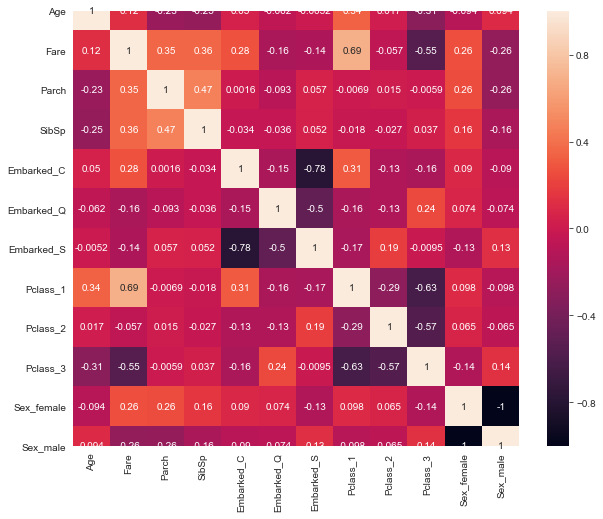

In [110]:
plt.figure(figsize = (10,8))
sns.heatmap(train.corr(),annot = True)

In [115]:
from sklearn.preprocessing import PolynomialFeatures
qr = PolynomialFeatures(degree = 2)

In [116]:
x_qr_train = qr.fit_transform(train)
x_qr_test = qr.fit_transform(test)

In [117]:
gboost.fit(x_qr_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=49,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [118]:
pred_test = gboost.predict(x_qr_test)

In [119]:
pred12 = pd.DataFrame(pred_test)
pred12.to_csv('titanic_submission_polynomial.csv')

In [128]:
all_data

,Age,Fare,Parch,SibSp,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.000,2.482,0.000,0.730,0,0,1,0,0,1,0,1
1,38.000,6.003,0.000,0.730,1,0,0,1,0,0,1,0
2,26.000,2.591,0.000,0.000,0,0,1,0,0,1,1,0
3,35.000,5.464,0.000,0.730,0,0,1,1,0,0,1,0
4,35.000,2.610,0.000,0.000,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.000,2.610,0.000,0.000,0,0,1,0,0,1,0,1
1305,39.000,6.825,0.000,0.000,1,0,0,1,0,0,1,0
1306,38.500,2.482,0.000,0.000,0,0,1,0,0,1,0,1
1307,29.000,2.610,0.000,0.000,0,0,1,0,0,1,0,1


In [131]:
from catboost import CatBoostClassifier, CatBoostRegressor
cat_boost =CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=2, learning_rate=0.5, depth=3)

In [132]:
cat_boost.fit(train,y_train,eval_set=(train,y_train), early_stopping_rounds=100)

0:	learn: 0.8002245	test: 0.8002245	best: 0.8002245 (0)	total: 202ms	remaining: 3m 22s
1:	learn: 0.8226712	test: 0.8226712	best: 0.8226712 (1)	total: 220ms	remaining: 1m 49s
2:	learn: 0.8271605	test: 0.8271605	best: 0.8271605 (2)	total: 225ms	remaining: 1m 14s
3:	learn: 0.8338945	test: 0.8338945	best: 0.8338945 (3)	total: 231ms	remaining: 57.6s
4:	learn: 0.8361392	test: 0.8361392	best: 0.8361392 (4)	total: 234ms	remaining: 46.5s
5:	learn: 0.8383838	test: 0.8383838	best: 0.8383838 (5)	total: 236ms	remaining: 39.1s
6:	learn: 0.8428732	test: 0.8428732	best: 0.8428732 (6)	total: 238ms	remaining: 33.8s
7:	learn: 0.8451178	test: 0.8451178	best: 0.8451178 (7)	total: 241ms	remaining: 29.8s
8:	learn: 0.8451178	test: 0.8451178	best: 0.8451178 (7)	total: 243ms	remaining: 26.7s
9:	learn: 0.8462402	test: 0.8462402	best: 0.8462402 (9)	total: 253ms	remaining: 25.1s
10:	learn: 0.8473625	test: 0.8473625	best: 0.8473625 (10)	total: 256ms	remaining: 23s
11:	learn: 0.8496072	test: 0.8496072	best: 0.849607

129:	learn: 0.9427609	test: 0.9427609	best: 0.9438833 (128)	total: 507ms	remaining: 3.39s
130:	learn: 0.9450056	test: 0.9450056	best: 0.9450056 (130)	total: 508ms	remaining: 3.37s
131:	learn: 0.9427609	test: 0.9427609	best: 0.9450056 (130)	total: 509ms	remaining: 3.35s
132:	learn: 0.9427609	test: 0.9427609	best: 0.9450056 (130)	total: 510ms	remaining: 3.33s
133:	learn: 0.9438833	test: 0.9438833	best: 0.9450056 (130)	total: 511ms	remaining: 3.3s
134:	learn: 0.9450056	test: 0.9450056	best: 0.9450056 (130)	total: 512ms	remaining: 3.28s
135:	learn: 0.9450056	test: 0.9450056	best: 0.9450056 (130)	total: 513ms	remaining: 3.26s
136:	learn: 0.9438833	test: 0.9438833	best: 0.9450056 (130)	total: 514ms	remaining: 3.24s
137:	learn: 0.9450056	test: 0.9450056	best: 0.9450056 (130)	total: 515ms	remaining: 3.22s
138:	learn: 0.9461279	test: 0.9461279	best: 0.9461279 (138)	total: 517ms	remaining: 3.2s
139:	learn: 0.9461279	test: 0.9461279	best: 0.9461279 (138)	total: 518ms	remaining: 3.18s
140:	learn: 

291:	learn: 0.9640853	test: 0.9640853	best: 0.9640853 (288)	total: 831ms	remaining: 2.02s
292:	learn: 0.9640853	test: 0.9640853	best: 0.9640853 (288)	total: 832ms	remaining: 2.01s
293:	learn: 0.9640853	test: 0.9640853	best: 0.9640853 (288)	total: 833ms	remaining: 2s
294:	learn: 0.9640853	test: 0.9640853	best: 0.9640853 (288)	total: 835ms	remaining: 1.99s
295:	learn: 0.9652076	test: 0.9652076	best: 0.9652076 (295)	total: 836ms	remaining: 1.99s
296:	learn: 0.9652076	test: 0.9652076	best: 0.9652076 (295)	total: 837ms	remaining: 1.98s
297:	learn: 0.9652076	test: 0.9652076	best: 0.9652076 (295)	total: 838ms	remaining: 1.97s
298:	learn: 0.9652076	test: 0.9652076	best: 0.9652076 (295)	total: 839ms	remaining: 1.97s
299:	learn: 0.9652076	test: 0.9652076	best: 0.9652076 (295)	total: 840ms	remaining: 1.96s
300:	learn: 0.9652076	test: 0.9652076	best: 0.9652076 (295)	total: 841ms	remaining: 1.95s
301:	learn: 0.9652076	test: 0.9652076	best: 0.9652076 (295)	total: 842ms	remaining: 1.95s
302:	learn: 0

383:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 978ms	remaining: 1.57s
384:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 979ms	remaining: 1.56s
385:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 980ms	remaining: 1.56s
386:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 981ms	remaining: 1.55s
387:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 982ms	remaining: 1.55s
388:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 983ms	remaining: 1.54s
389:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 984ms	remaining: 1.54s
390:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 985ms	remaining: 1.53s
391:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 986ms	remaining: 1.53s
392:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 987ms	remaining: 1.52s
393:	learn: 0.9719416	test: 0.9719416	best: 0.9719416 (348)	total: 989ms	remaining: 1.52s
394:	learn

497:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.14s	remaining: 1.15s
498:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.15s	remaining: 1.15s
499:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.15s	remaining: 1.15s
500:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.15s	remaining: 1.14s
501:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.15s	remaining: 1.14s
502:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.15s	remaining: 1.14s
503:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.16s	remaining: 1.14s
504:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.16s	remaining: 1.13s
505:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.16s	remaining: 1.13s
506:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.16s	remaining: 1.13s
507:	learn: 0.9730640	test: 0.9730640	best: 0.9730640 (419)	total: 1.16s	remaining: 1.12s
508:	learn

In [133]:
prediction_cb = cat_boost.predict(test)

In [134]:
pred15 = pd.DataFrame(prediction_cb)
pred15.to_csv('titanic_submission_cb.csv')